In [24]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
"""
    造造造数据:二分类数据、三分类数据、四分类数据
"""
set_size = 50
X1 = np.random.uniform(0,2,size=set_size)
X2 = np.random.uniform(0,2,size=set_size)
Y1 = np.random.uniform(3,5,size=set_size)
Y2 = np.random.uniform(3,5,size=set_size)

P1 = np.hstack((X1,X2)).reshape(set_size,2,order='F')
P2 = np.hstack((X1,Y1)).reshape(set_size,2,order='F')
P3 = np.hstack((Y1,Y2)).reshape(set_size,2,order='F')
P4 = np.hstack((Y1,X1)).reshape(set_size,2,order='F')

twoClass = np.vstack((P1,P3))
threeClass = np.vstack((P1,P2,P3))
fourClass = np.vstack((P1,P2,P3,P4))

np.savetxt("data/testSet2.txt",twoClass)
np.savetxt("data/testSet3.txt",threeClass)
np.savetxt("data/testSet4.txt",fourClass)

In [3]:
"""
    读取数据集
    
    Args:
        filename:文件名
    Returns:
        dataMat:数据样本矩阵
"""
def loadDataSet(filename):
    dataMat = []
    with open(filename, 'rb') as f:       
        for line in f:
            line = line.decode('utf-8').strip()
            eles = list(map(float, line.split(' ')[:5]))
            dataMat.append(eles)
    return dataMat

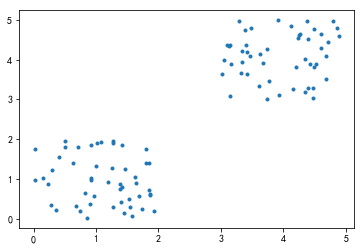

In [23]:
'''
    先画个示意图看看
'''

dataMat = np.mat(loadDataSet('data/testSet2.txt'))
plt.plot(dataMat[:,0],dataMat[:,1],".") 
plt.show()

In [4]:
"""
    计算两向量的欧式距离
    
    Args:
        vecA:向量A
        vecB:向量B
    Returns:
        欧式距离
"""
def distEclud(vecA, vecB):
    print(vecA)
    print(vecB)
    return np.sqrt(np.sum(np.power((vecA - vecB),2)))

In [5]:
"""
    随机生成k个聚类中心
    
    Args:
        dataSet:数据集
        k:簇数目
    Returns:
        centroids:聚类中心矩阵
"""
def randCent(dataSet, k):
    m,_ =dataSet.shape
    #随机从数据集中选几个作为初始聚类中心
    centroids = dataSet.take(np.random.choice(m,k), axis=0)
    return centroids

In [6]:
"""
    K-Means
    
    Args:
        dataSet:数据集
        k:簇数目
    Returns:
        centroids:聚类中心
        clusterAssment:点分配结果
"""
def kMeans(dataSet, k, maxlter = 5):
    # 随机初始化聚类中心
    centroids = randCent(dataSet, k)
    init_centroids = centroids.copy()
    
    m, n = np.shape(dataSet)
    
    #点分配结果：第一列指明样本所在的簇，第二列指明样本到簇类中心的距离
    clusterAssment = np.mat(np.zeros((m,2)))
    
    #标识聚类中心石方仍在改变
    clusterChanged = True
    
    #直至聚类中心不再变化
    iterCount = 0
    while clusterChanged and iterCount < maxlter:
        iterCount += 1
        clusterChanged = False
        #分配样本到簇
        for i in range(m):
            #计算第i个样本到各个聚类中心的距离
            minIndex = 0
            minDist = np.inf
            for j in range(k):
                dist = distEclud(dataSet[i, :],centroids[j, :])
                if(dist < minDist):
                    minIndex = j
                    minDist = dist
            #任何一个样本的类簇分配发生变化则认为变化
            if(clusterAssment[i,0]!=minIndex):
                clusterChanged = True
            clusterAssment[i, :] = minIndex , minDist**2
            
        #刷新聚类中：移动聚类中心到所在簇的均值位置
        for cent in range(k):
            #通过数组过滤获得簇中的点
            pstInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == cent)[0]]
            if pstInCluster.shape[0] > 0:
                #计算均值并移动
                centroids[cent,:] = np.mean(pstInCluster, axis=0)
    return centroids, clusterAssment, init_centroids

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dataMat = np.mat(loadDataSet('data/testSet2.txt'))
m,n = np.shape(dataMat)

In [9]:
set_k = 2
centroids , clusterAssment, init_centroids = kMeans(dataMat,set_k)

clusterCount = np.shape(centroids)[0]
#注意，这里我们只假设了最多4个簇的样式，所以前面如果set_k设置超过了4，这里会报错
patterns = ['o','D','^','s'] 
colors = ['b','g','y','black']

[[ 0.01624246  1.75616657]]
[[ 1.08561709  1.93963565]]
[[ 0.01624246  1.75616657]]
[[ 0.92097096  1.86102156]]
[[ 1.26642917  1.96604178]]
[[ 1.08561709  1.93963565]]
[[ 1.26642917  1.96604178]]
[[ 0.92097096  1.86102156]]
[[ 0.6355107   1.39983788]]
[[ 1.08561709  1.93963565]]
[[ 0.6355107   1.39983788]]
[[ 0.92097096  1.86102156]]
[[ 1.08561709  1.93963565]]
[[ 1.08561709  1.93963565]]
[[ 1.08561709  1.93963565]]
[[ 0.92097096  1.86102156]]
[[ 1.79500653  1.74428245]]
[[ 1.08561709  1.93963565]]
[[ 1.79500653  1.74428245]]
[[ 0.92097096  1.86102156]]
[[ 1.3878724   0.87801099]]
[[ 1.08561709  1.93963565]]
[[ 1.3878724   0.87801099]]
[[ 0.92097096  1.86102156]]
[[ 0.01973051  0.97808727]]
[[ 1.08561709  1.93963565]]
[[ 0.01973051  0.97808727]]
[[ 0.92097096  1.86102156]]
[[ 0.92097096  1.86102156]]
[[ 1.08561709  1.93963565]]
[[ 0.92097096  1.86102156]]
[[ 0.92097096  1.86102156]]
[[ 1.4673309  1.2411572]]
[[ 1.08561709  1.93963565]]
[[ 1.4673309  1.2411572]]
[[ 0.92097096  1.8610215

[[ 3.37475981  3.39962863]]
[[ 0.91213776  0.97633851]]
[[ 0.88302121  0.8456671 ]]
[[ 0.27969042  0.34019585]]
[[ 3.37475981  3.39962863]]
[[ 0.27969042  0.34019585]]
[[ 0.88302121  0.8456671 ]]
[[ 1.44085936  0.14621907]]
[[ 3.37475981  3.39962863]]
[[ 1.44085936  0.14621907]]
[[ 0.88302121  0.8456671 ]]
[[ 1.0104284   1.90287686]]
[[ 3.37475981  3.39962863]]
[[ 1.0104284   1.90287686]]
[[ 0.88302121  0.8456671 ]]
[[ 0.85540279  0.01779047]]
[[ 3.37475981  3.39962863]]
[[ 0.85540279  0.01779047]]
[[ 0.88302121  0.8456671 ]]
[[ 1.25094151  1.27278715]]
[[ 3.37475981  3.39962863]]
[[ 1.25094151  1.27278715]]
[[ 0.88302121  0.8456671 ]]
[[ 1.85616951  0.58845725]]
[[ 3.37475981  3.39962863]]
[[ 1.85616951  0.58845725]]
[[ 0.88302121  0.8456671 ]]
[[ 1.53128206  0.50079421]]
[[ 3.37475981  3.39962863]]
[[ 1.53128206  0.50079421]]
[[ 0.88302121  0.8456671 ]]
[[ 1.68182112  0.57906095]]
[[ 3.37475981  3.39962863]]
[[ 1.68182112  0.57906095]]
[[ 0.88302121  0.8456671 ]]
[[ 1.42327199  1.850

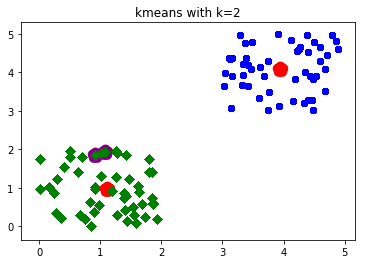

In [10]:
fig = plt.figure()
title = "kmeans with k={}".format(set_k)
ax = fig.add_subplot(111, title=title)
for k in range(clusterCount):
     #绘制聚类中心
    ax.scatter(centroids[k, 0], centroids[k, 1], color='r',marker='*',linewidths=10)
    #绘制初始化聚类中心
    ax.scatter(init_centroids[k, 0], init_centroids[k, 1], color='purple',marker='*',linewidths=10)
    for i in range(m):
        #绘制属于该聚类中心的样本
        pstInCluster = dataMat[np.nonzero(clusterAssment[:, 0].A==k)[0]]
        ax.scatter(pstInCluster[:, 0].flatten().A[0],pstInCluster[:, 1].flatten().A[0], marker=patterns[k],color=colors[k])